<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
Специализация "Машинное обучение и анализ данных"
</center>

# <center>Идентификация пользователей по посещенным веб-страницам

В этом проекте решалась задачу идентификации пользователя по его поведению в сети Интернет. Это сложная и интересная задача на стыке анализа данных и поведенческой психологии. В качестве примера, компания Яндекс решает задачу идентификации взломщика почтового ящика по его поведению. В двух словах, взломщик будет себя вести не так, как владелец ящика: он может не удалять сообщения сразу по прочтении, как это делал хозяин, он будет по-другому ставить флажки сообщениям и даже по-своему двигать мышкой. Тогда такого злоумышленника можно идентифицировать и "выкинуть" из почтового ящика, предложив хозяину войти по SMS-коду. Этот пилотный проект описан в [статье](https://habrahabr.ru/company/yandex/blog/230583/) на Хабрахабре. Похожие вещи делаются, например, в Google Analytics и описываются в научных статьях, найти можно многое по фразам "Traversal Pattern Mining" и "Sequential Pattern Mining".

## Задача: 
    
По последовательности из нескольких веб-сайтов, посещенных подряд один и тем же человеком, мы будем идентифицировать этого человека. Идея такая: пользователи Интернета по-разному переходят по ссылкам, и это может помогать их идентифицировать (кто-то сначала в почту, потом про футбол почитать, затем новости, контакт, потом наконец – работать, кто-то – сразу работать).

## Данные:

Будем использовать данные из [статьи](http://ceur-ws.org/Vol-1703/paper12.pdf) "A Tool for Classification of Sequential Data". И хотя мы не можем рекомендовать эту статью (описанные методы далеки от state-of-the-art, лучше обращаться к [книге](http://www.charuaggarwal.net/freqbook.pdf) "Frequent Pattern Mining" и последним статьям с ICDM), но данные там собраны аккуратно и представляют интерес.

Данные пришли с прокси-серверов Университета Блеза Паскаля и имеют очень простой вид. Для каждого пользователя заведен csv-файл с названием user\*\*\*\*.csv (где вместо звездочек – 4 цифры, соответствующие ID пользователя), а в нем посещения сайтов записаны в следующем формате: <br>

| timestamp               | site            | 
|:-------------           |:---------------:| 
| 2013-11-15 08:12:07     | google.com      |
| 2013-11-15 08:12:38     | youtube.com     |
| 2013-11-15 08:12:58     | github.com      |
    
Скачать исходные данные можно по [ссылке](http://fc.isima.fr/~kahngi/cez13.zip) в статье, там же описание.
Для этого задания хватит данных не по всем 3000 пользователям, а по 10 и 150. [Ссылка](https://yadi.sk/d/3gscKIdN3BCASG) на архив *capstone_user_identification* (~7 Mb, в развернутом виде ~ 60 Mb). 

Данные устроены следующем образом:

 - В каталоге `10users` лежат 10 csv-файлов с названием вида "user[USER_ID].csv", где [USER_ID] – ID пользователя;
 - Аналогично для каталога `150users` – там 150 файлов;
 - В `3users` – игрушечный пример из 3 файлов, это для отладки кода предобработки, который вы далее напишете.

## <center> План проекта

### 1 неделя. Подготовка данных к анализу и построению моделей. Programming Assignment

Первая часть проекта посвящена подготовке данных для дальнейшего описательного анализа и построения прогнозных моделей. Надо будет написать код для предобработки данных (исходно посещенные веб-сайты указаны для каждого пользователя в отдельном файле) и формирования единой обучающей выборки. Также в этой части мы познакомимся с разреженным форматом данных (матрицы Scipy.sparse), который хорошо подходит для данной задачи.

    Подготовка обучающей выборки
    Работа с разреженным форматом данных

### 2 неделя. Подготовка и первичный анализ данных. Programming Assignment

На второй неделе мы продолжим подготовливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии. Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями.

    Подготовка нескольких обучающих выборок для сравнения
    Первичный анализ данных, проверка гипотез

### 3 неделя. Визуальный анализ данных построение признаков. Peer-Review

На 3 неделе мы займемся визуальным анализом данных и построением признаков. Сначала мы вместе построим и проанализируем несколько признаков, потом Вы сможете сами придумать и описать различные признаки. Задание имеет вид Peer-Review, так что творчество здесь активно приветствуется. Если задействуете IPython-виджеты, библиотеку Plotly, анимации и прочий интерактив, всем от этого будет только лучше.

    Визуальный анализ данных
    Построение признаков

### 4 неделя. Сравнение алгоритмов классификации. Programming Assignment

Тут мы наконец подойдем к обучению моделей классификации, сравним на кросс-валидации несколько алгоритмов, разберемся, какие параметры длины сессии (session_length и window_size) лучше использовать. Также для выбранного алгоритма построим кривые валидации (как качество классификации зависит от одного из гиперпараметров алгоритма) и кривые обучения (как качество классификации зависит от объема выборки).

    Сравнение нескольких алгоритмов на сессиях из 10 сайтов
    Выбор параметров – длины сессии и ширины окна
    Идентификация конкретного пользователя и кривые обучения

### 5 неделя. Соревнование Kaggle Inclass по идентификации пользователей. Peer-Review

Здесь мы вспомним про концепцию стохастического градиентного спуска и попробуем классификатор Scikit-learn SGDClassifier, который работает намного быстрее на больших выборках, чем алгоритмы, которые мы тестировали на 4 неделе. Также мы познакомимся с данными соревнования Kaggle по идентификации пользователей и сделаем в нем первые посылки. По итогам этой недели дополнительные баллы получат те, кто побьет указанные в соревновании бенчмарки.

### 6 неделя. Vowpal Wabbit. Tutorial + Programming Assignment

На этой неделе мы познакомимся с популярной библиотекой Vowpal Wabbit и попробуем ее на данных по веб-сессиям. Знакомиться будем на данных Scikit-learn по новостям, сначала в режиме бинарной классификации, затем – в многоклассовом режиме. Затем будем классифицировать рецензии к фильмам с сайта IMDB. Наконец, применим Vowpal Wabbit к данным по веб-сессиям. Материала немало, но Vowpal Wabbit того стоит!

    Статья про Vowpal Wabbit
    Применение Vowpal Wabbit к данным по посещению сайтов

### 7 неделя. Оформление финального проекта. Peer-Review

# <center>Неделя 1. Подготовка данных к анализу и построению моделей

Первая часть проекта посвящена подготовке данных для дальнейшего описательного анализа и построения прогнозных моделей. Надо будет написать код для предобработки данных (исходно посещенные веб-сайты указаны для каждого пользователя в отдельном файле) и формирования единой обучающей выборки. Также в этой части мы познакомимся с разреженным форматом данных (матрицы Scipy.sparse), который хорошо подходит для данной задачи. 

**План 1 недели:**
 - Часть 1. Подготовка обучающей выборки
 - Часть 2. Работа с разреженным форматом данных

**Поставим задачу классификации: идентифицировать пользователя по сессии из 10 подряд посещенных сайтов. Объектом в этой задаче будет сессия из 10 сайтов, последовательно посещенных одним и тем же пользователем, признаками – индексы этих 10 сайтов (чуть позже здесь появится "мешок" сайтов, подход Bag of Words). Целевым классом будет id пользователя.**

## Часть 1. Подготовка обучающей выборки
Реализована функция *prepare_train_set*, которая принимает на вход путь к каталогу с csv-файлами *path_to_csv_files* и параметр *session_length* – длину сессии, а возвращает 2 объекта:
- DataFrame, в котором строки соответствуют уникальным сессиям из *session_length* сайтов, *session_length* столбцов – индексам этих *session_length* сайтов и последний столбец – ID пользователя
- частотный словарь сайтов вида {'site_string': [site_id, site_freq]}, например для недавнего игрушечного примера это будет {'vk.com': (1, 2), 'google.com': (2, 2), 'yandex.ru': (3, 3), 'facebook.com': (4, 1)}


## Часть 2. Работа с разреженным форматом данных

**Если так подумать, то полученные признаки *site1*, ..., *site10* смысла не имеют как признаки в задаче классификации. А вот если воспользоваться идеей мешка слов из анализа текстов – это другое дело.

Создадим новые матрицы, в которых строкам будут соответствовать сессии из 10 сайтов, а столбцам – индексы сайтов. На пересечении строки $i$ и столбца $j$ будет стоять число $n_{ij}$ – cколько раз сайт $j$ встретился в сессии номер $i$. Делать это будем с помощью разреженных матриц Scipy – [csr_matrix](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.sparse.csr_matrix.html). 

Реализована функция, преобразующая данные по собранным сессиям в разреженный формат.

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь применим идею скользящего окна – сессии будут перекрываться. 

Реализуем функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

## Часть 2. Первичный анализ данных, проверка гипотез

Считаем в DataFrame подготовленный на 1 неделе файл с сессиями. Далее будем работать с ним.

Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.

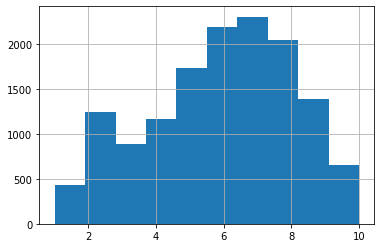

In [17]:
pd.Series(num_unique_sites).hist();

Проверим с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально. 

((array([-3.89403843, -3.6734386 , -3.55253248, ...,  3.55253248,
          3.6734386 ,  3.89403843]),
  array([ 1,  1,  1, ..., 10, 10, 10])),
 (2.308739910778148, 5.951923760756702, 0.9770787039552056))

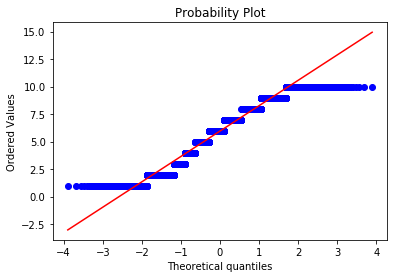

In [18]:
stats.probplot(num_unique_sites, plot=plt)

In [19]:
stats.shapiro(num_unique_sites)

(0.9546933174133301, 0.0)

p-value очень близко к 0, уверенно отвергаем гипотезу о нормальном распределении.

По графику тоже наблюдаем очень тяжелые хвосты распределения.

# <center>Неделя 3. Визуальный анализ данных и построение признаков

На 3 неделе мы займемся визуальным анализом данных и построением признаков. Сначала мы вместе построим и проанализируем несколько признаков, потом Вы сможете сами придумать и описать различные признаки. Задание имеет вид Peer-Review, так что творчество здесь активно приветствуется. Если задействуете IPython-виджеты, библиотеку Plotly, анимации и прочий интерактив, всем от этого будет только лучше.

**План 3 недели:**
 - Часть 1. Построение признаков
 - Часть 2. Визуальный анализ данных
 - Часть 3. Дальнейшее построение признаков
 - Часть 4. Проверка построенных признаков

## Часть 1. Построение признаков

Создадим на основе функций *prepare_train_set* и *prepare_sparse_train_set_window*  новую – *prepare_train_set_with_fe*, (от "feature engineering"), создайте следующие признаки:
- `session_timespan` – продолжительность сессии (разница между максимальным и минимальным временем посещения сайтов в сессии, в секундах)
- `#unique_sites` – число уникальных сайтов в сессии 
- `start_hour` – час начала сессии (то есть час в записи минимального timestamp среди десяти)
- `day_of_week` – день недели (то есть день недели в записи минимального timestamp среди десяти)

Функция должна возвращать новый DataFrame (как возвращала функция *prepare_train_set*), только признаков должно быть на 4 больше. Порядок, в котором добавляются признаки: *site1*, ... *site10*, *session_timespan*, *#unique_sites*, *start_hour*, *day_of_week* и *user_id* (это видно и чуть ниже по тому, как функция вызывается).

## Часть 2. Визуальный анализ данных

**Забавы ради, для потехи дадим пользователям имена и ассоциируем с ними цвета.**

1. Построим гистограмму распределения длины сессии в секундах (*session_timespan*). Ограничим по *x* значением 200 (иначе слишком тяжелый хвост).

Text(0, 0.5, 'Число сессий')

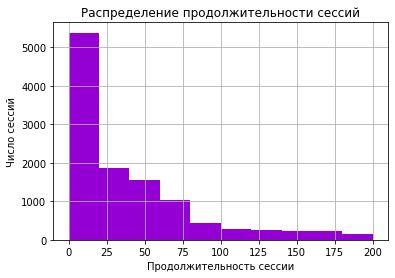

In [16]:
train_data_10users[train_data_10users['session_timespan'] <= 200]['session_timespan'].hist(color='darkviolet')
plt.title('Распределение продолжительности сессий')
plt.xlabel('Продолжительность сессии')
plt.ylabel('Число сессий')

2. Построим гистограмму распределения числа уникальных сайтов в сессии (*#unique_sites*). 

Text(0, 0.5, 'Число сессий')

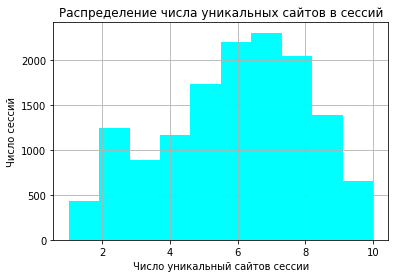

In [17]:
train_data_10users['#unique_sites'].hist(color='aqua')
plt.title('Распределение числа уникальных сайтов в сессий')
plt.xlabel('Число уникальный сайтов сессии')
plt.ylabel('Число сессий')

3. Построим гистограммы распределения числа уникальных сайтов в сессии (*#unique_sites*) для каждого из 10 пользователей по отдельности.

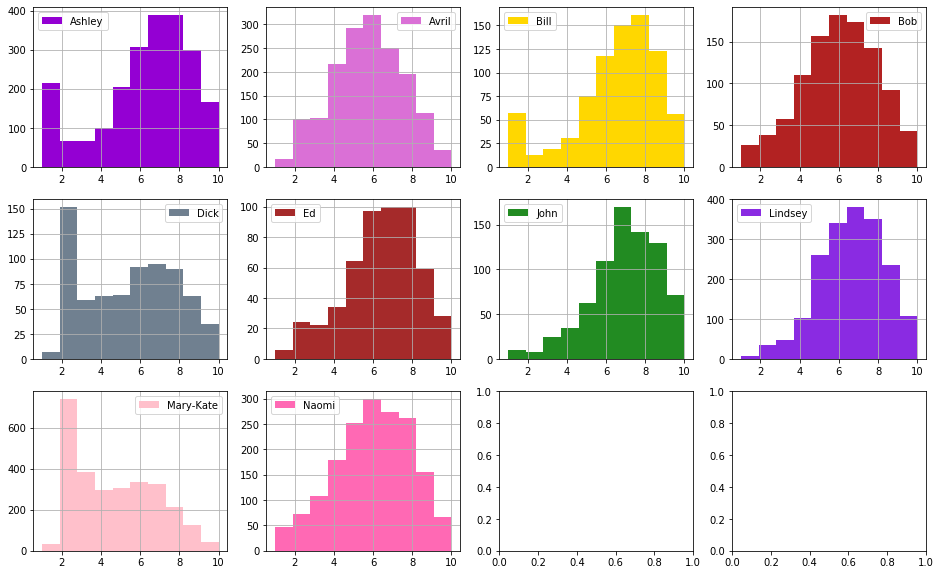

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

# как вариант, можно и по-другому
for idx, (user, sub_df) in  enumerate(train_data_10users.groupby('userid')): 
    ax = axes[idx // 4, idx % 4]
    sub_df['#unique_sites'].hist(ax=ax, color=color_dic[user])
    ax.legend([user])

4. Построим гистограмму распределения часа начала сессии (*start_hour*). 

Text(0, 0.5, 'Число сессий')

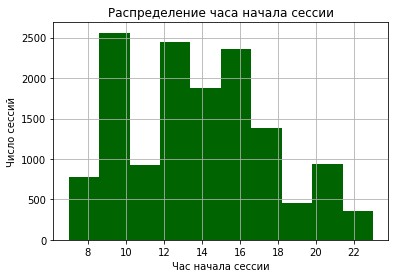

In [19]:
train_data_10users['start_hour'].hist(color='darkgreen')
plt.title('Распределение часа начала сессии')
plt.xlabel('Час начала сессии')
plt.ylabel('Число сессий')

5. Постройте гистограммы распределения часа начала сессии (*start_hour*) для каждого из 10 пользователей по отдельности.

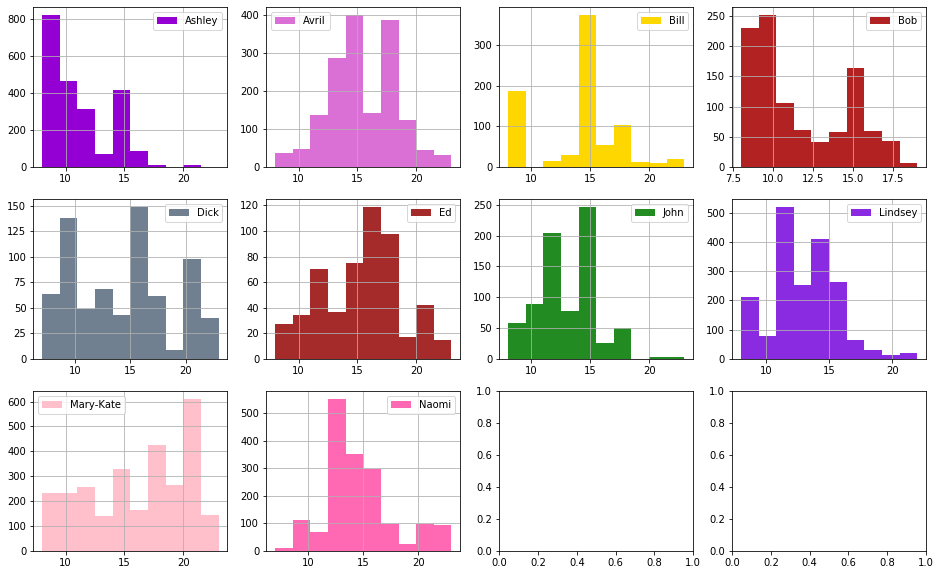

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

# как вариант, можно и по-другому
for idx, (user, sub_df) in  enumerate(train_data_10users.groupby('userid')): 
    ax = axes[idx // 4, idx % 4]
    sub_df['start_hour'].hist(ax=ax, color=color_dic[user])
    ax.legend([user])

6. Построим гистограмму распределения дня недели, в который началась сессия (*day_of_week*).

Text(0, 0.5, 'Число сессий')

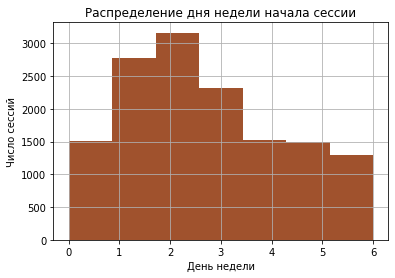

In [21]:
# В неделе 7 дней. Сделаем соответствующее количество столбцов в гистограмме
train_data_10users['day_of_week'].hist(color='sienna', bins=7)
plt.title('Распределение дня недели начала сессии')
plt.xlabel('День недели')
plt.ylabel('Число сессий')

7. Построим гистограммы распределения дня недели, в который началась сессия (*day_of_week*) для каждого из 10 пользователей по отдельности.

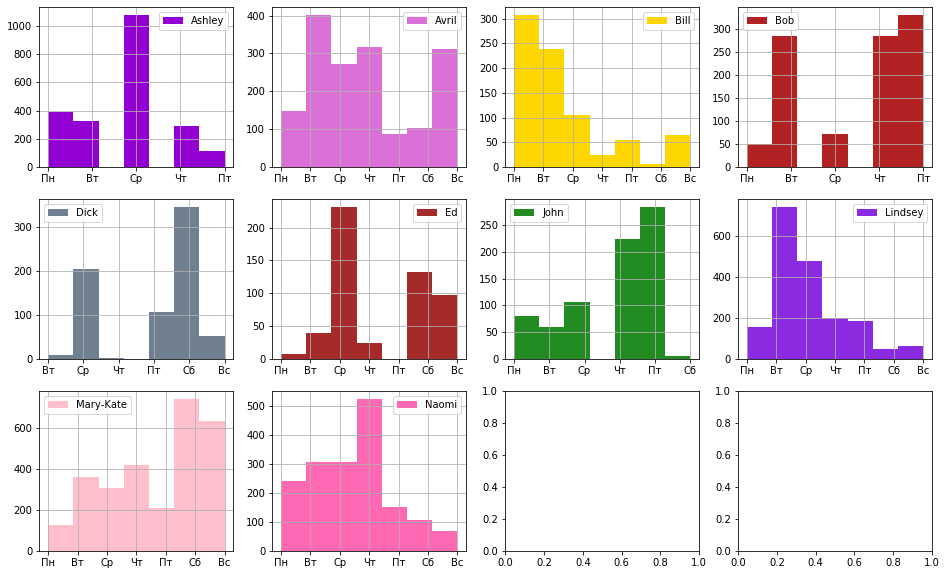

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

# как вариант, можно и по-другому
for idx, (user, sub_df) in  enumerate(train_data_10users.groupby('userid')):
    ax = axes[idx // 4, idx % 4]
    ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
    ax.set_xticklabels(['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
    sub_df['day_of_week'].hist(ax=ax, color=color_dic[user], bins=7)
    
    ax.legend([user])

8. Сделаем предварительные выводы про каждого пользователя по построенным графикам.

- У всех пользователей преобладают короткие сессии
- Ashley начинает сессии утром (примерно в 9-10 часов), второй пик приходится примерно на 15 часов. Основная активность приходится на среду, на выходных нет посещений сайтов. Обычно посещает либо один сайт за сессию, либо примерно 7-8 (бимодальное распределение)
- Avril, в основном, заходит в середине дня, очень редко утром или вечером. Посещает за сессию в среднем 6 сайтов.
- Bill чаще всего заходит днем (в 15 часов), или утром (реже). Активность максимальная в понедельник, к воскресенью уменьшается. Посещает либо один сайт, дибо примерно 8.
- Bob активен по будням, в основном в пн, чт и пт, больная активность с утра. Не посещает сайты в выходные дни. В среднем посещает 6 сайтов за сессию.
- Dick активен в течение всего дня, больще всего сб и ср. Сессии часто состоят из 2 уникальных сайтов.
- Ed более активен в середине дня. Активен в течение всей недели, но более всего в ср, сб и вс. Сессии по 6-8 уникальных сайтов
- John наиболее активен в 12-15 часов. Наибольная активность в будни, особенно в чт и пт. Сессии преимущественно по 7-8 сайтов.
- Lindsey наиболее активна в 11-16 часов. Сидит в интернете всю неделю, но наибольшая активность во вт и ср. Преимущественно 7-8 сайтов в сессии.
- Mary-Kate активна в течение всего дня, к вечеру активность увеличивается. Активна в течение всей недели, более всего - в выходные.  Чаще встречаются сессии из 2 уникальных сайтов
- Naomi активна в течение дня но больше всего в середине. Активна всю неделю, наиболее активна в среду. Сессии в среднем состоят из 6-8 уникальных сайтов.

Определим топ-10 самых посещаемых сайтов (*top10_sites*) и соответствующие кол-ва посещений (*top10_freqs*).

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

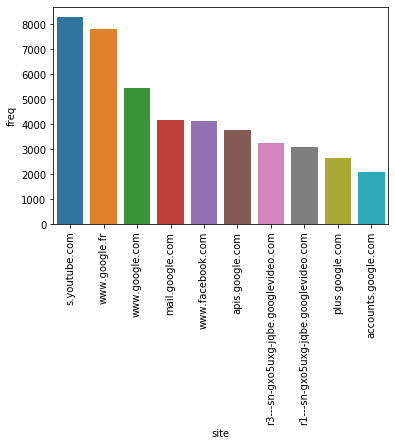

In [26]:
sns.barplot(x=top10_sites, y=top10_freqs)
plt.xticks(rotation=90)

## Часть 3. Проверка построенных признаков
Эта часть скорее техническая, смысл ее – убедиться, что мы все одинаково создали признаки *session_timespan, #unique_sites, start_hour* и *day_of_week*.

## Часть 4. Дальнейшее построение признаков

Это задание творческое, тут надо придумать, как еще учесть время посещения веб-страниц и прочие признаки. 

В этой части задания можно построить и визуально исследовать самые разные признаки (ничто фантазию не ограничивает):
- год, месяц и день начала сессии
- час начала сессии (с учетом года, месяца и дня)
- время суток
- среднее время пребывания на сайте, посчитать можно, скажем, для топ-30 популярных сайтов
- индикаторы посещения популярных сайтов (скажем, тоже для топ-30 популярных сайтов)
- частота посещения Facebook
- ...

Напишем функцию для создания новых признаков и применим ее к исходным данным. Функция будет возвращать такие признаки, как год, месяц, неделя и день начала сессии, неделю начала сессии, время суток, попадает ли сессия на выходные, отношение числа уникальных сайтов к длине сессии, а также среднее и медианное время, проведенное на сайте

На данном датасете кажется, что 'start_year' и 'start_month' почти бесполезны, потому что период меньше одного календарного года. Нет данных за какой-то длительный срок.

'start_day' имеет уникальное распределение для каждого пользователя, как и день недели, и может оказаться весьма полезной

'time_of_the_day' показывает, что никто из пользователей не сидит в интернете ночью. Может помочь сгруппировать пользователей по преимущественному времени активности и помочь модели.

'weekend' озволяет точно отделить пользователей, которые не имеют активности в выходные

'mean_site_time', 'median_site_time' показывают, что в основном у пользователей преобладают короткие посещения сайтов. Ее полезность для модели можно будет оценить при обучении.

Проверить полезность этих признаков мы сможем на 5 неделе.

# <center>Неделя 4.  Сравнение алгоритмов классификации

Теперь мы наконец подойдем к обучению моделей классификации, сравним на кросс-валидации несколько алгоритмов, разберемся, какие параметры длины сессии (*session_length* и *window_size*) лучше использовать. Также для выбранного алгоритма построим кривые валидации (как качество классификации зависит от одного из гиперпараметров алгоритма) и кривые обучения (как качество классификации зависит от объема выборки).

**План 4 недели:**
- Часть 1. Сравнение нескольких алгоритмов на сессиях из 10 сайтов
- Часть 2. Выбор параметров – длины сессии и ширины окна
- Часть 3. Идентификация  конкретного пользователя и кривые обучения
 

## Часть 1. Сравнение нескольких алгоритмов на сессиях из 10 сайтов

Разобьем выборку на 2 части. На одной будем проводить кросс-валидацию, на второй – оценивать модель, обученную после кросс-валидации

Зададим заранее тип кросс-валидации: 3-кратная, с перемешиванием, параметр random_state=17 – для воспроизводимости.

1. Обучим `KNeighborsClassifier` со 100 ближайшими соседями и посмотрим на долю правильных ответов на 3-кратной кросс-валидации по выборке `(X_train, y_train)` и отдельно на выборке `(X_valid, y_valid)`.

Посчитаем доли правильных ответов для KNeighborsClassifier на кросс-валидации и отложенной выборке.

In [14]:
ans = f'{np.round(cv_score, 3)} {np.round(knn_score, 3)}'
ans

'0.563 0.587'

2. Обучим случайный лес (`RandomForestClassifier`) из 100 деревьев. Посмотрим на OOB-оценку и на долю правильных ответов на выборке `(X_valid, y_valid)`.

In [21]:
ans = f'{np.round(oob, 3)} {np.round(val_score, 3)}'
ans

'0.724 0.731'

3. Обучим логистическую регрессию (`LogisticRegression`) с параметром `C` по умолчанию. Посмотрим на долю правильных ответов на кросс-валидации и на выборке `(X_valid, y_valid)`.

In [28]:
ans = f'{np.round(cv_score, 3)} {np.round(val_score, 3)}'
ans

'0.761 0.777'

Предварительно можно видеть, что логистическая регрессия показывает лучший результат при заданных параметрах.

С помощью `LogisticRegressionCV` подберем параметр `C` для `LogisticRegression` сначала в широком диапазоне: 10 значений от 1e-4 до 1e2

Выведем лучшее значение доли правильных ответов на кросс-валидации и соответствующее значение `C`.

In [33]:
max_score = max(logit_mean_cv_scores1)
max_score

0.7610254470801336

In [34]:
logit_grid_searcher1.Cs_[logit_mean_cv_scores1.argmax()]

1.0

Нарисуем график зависимости доли правильных ответов на кросс-валидации от `C`.

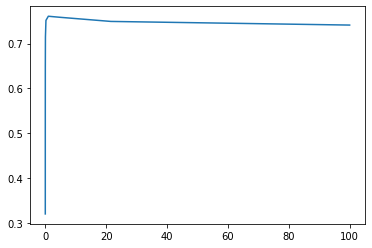

In [35]:
plt.plot(logit_c_values1, logit_mean_cv_scores1);

Теперь то же самое, только значения параметра `C` перебираем в диапазоне `np.linspace`(0.1, 7, 20). Опять нарисуем кривые валидации,

Выведем лучшее значение доли правильных ответов на кросс-валидации и соответствующее значение `C`.

In [38]:
max_score = max(logit_mean_cv_scores2)
max_score

0.7615335461873364

In [39]:
logit_grid_searcher2.Cs_[logit_mean_cv_scores2.argmax()]

1.9157894736842107

Нарисуйте график зависимости доли правильных ответов на кросс-валидации от `C`.

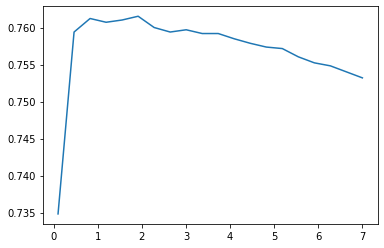

In [40]:
plt.plot(logit_c_values2, logit_mean_cv_scores2);

Выведем долю правильных ответов на выборке `(X_valid, y_valid)` для логистической регрессии с лучшим найденным значением `C`.

In [41]:
logit_cv_acc = accuracy_score(y_valid, logit_grid_searcher2.predict(X_valid))
logit_cv_acc

0.7790945721735009

4. Обучим линейный SVM (`LinearSVC`) с параметром `C`=1

Посмотрим долю правильных ответов на кросс-валидации и отложенной выборке.

In [48]:
ans = f'{np.round(cv_score, 3)} {np.round(val_score, 3)}'
print(ans)
# with open('answer4_5.txt', 'w') as file:
#     file.write(ans)

0.751 0.777


С помощью `GridSearchCV` подберем параметр `C` для SVM сначала в широком диапазоне: 10 значений от 1e-4 до 1e4, используйте `linspace` из NumPy. Нарисуем кривые валидации.

Выведите лучшее значение доли правильных ответов на кросс-валидации и соответствующее значение `C`.

In [50]:
svm_grid_searcher1.best_score_

0.6868546856376824

In [51]:
svm_grid_searcher1.best_params_

{'C': 2222.2223000000004}

Нарисуем график зависимости доли правильных ответов на кросс-валидации от `C`.

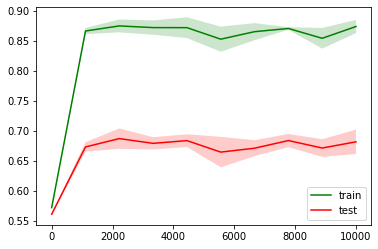

In [52]:
plot_validation_curves(svm_params1['C'], svm_grid_searcher1.cv_results_)

**Но мы помним, что с параметром регуляризации по умолчанию (С=1) на кросс-валидации доля правильных ответов выше. Это тот случай (не редкий), когда можно ошибиться и перебирать параметры не в том диапазоне (причина в том, что мы взяли равномерную сетку на большом интервале и упустили действительно хороший интервал значений `C`). Здесь намного осмысленней подбирать `C` в районе 1, к тому же, так модель быстрее обучается, чем при больших `C`. **

С помощью `GridSearchCV` подберем параметр `C` для SVM в диапазоне (1e-3, 1), 30 значений, используйте `linspace` из NumPy. Нарисуйте кривые валидации.

Выведите лучшее значение доли правильных ответов на кросс-валидации и соответствующее значение `C`.

In [54]:
svm_grid_searcher2.best_score_

0.7670206386611259

In [55]:
svm_grid_searcher2.best_params_

{'C': 0.10434482758620689}

Нарисуйте график зависимости доли правильных ответов на кросс-валидации от С.

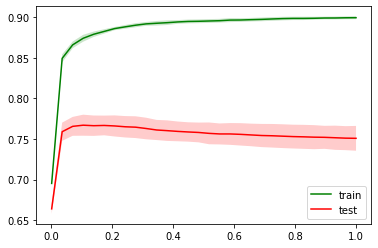

In [56]:
plot_validation_curves(svm_params2['C'], svm_grid_searcher2.cv_results_)

Выведем долю правильных ответов на выборке `(X_valid, y_valid)` для `LinearSVC` с лучшим найденным значением `C`.

In [57]:
svm_cv_acc = accuracy_score(y_valid, svm_grid_searcher2.predict(X_valid))
svm_cv_acc

0.7807537331121118

## Часть 2. Выбор параметров – длины сессии и ширины окна

Возьмем `LinearSVC`, показавший лучшее качество на кросс-валидации в 1 части, и проверим его работу еще на 8 выборках для 10 пользователей (с разными сочетаниями параметров *session_length* и *window_size*). Поскольку тут уже вычислений побольше, мы не будем каждый раз заново подбирать параметр регуляризации `C`.

Применим функцию *model_assessment* для лучшего алгоритма из предыдущей части (а именно, `svm_grid_searcher2.best_estimator_`) и 9 выборок вида с разными сочетаниями параметров *session_length* и *window_size* для 10 пользователей. 

## Часть 3. Идентификация  конкретного пользователя и кривые обучения

**Поскольку может разочаровать, что многоклассовая доля правильных ответов на выборке из 150 пользовалей невелика, порадуемся тому, что конкретного пользователя можно идентифицировать достаточно хорошо. **

**Загрузим сериализованные ранее объекты *X_sparse_150users* и *y_150users*, соответствующие обучающей выборке для 150 пользователей с параметрами (*session_length, window_size*) = (10,10). Так же точно разобьем их на 70% и 30%.**

Обучим `LogisticRegressionCV` для одного значения параметра `C`. Теперь будем решать 150 задач "Один-против-Всех", поэтому укажием аргумент `multi_class`='ovr'.

Посмотрим на средние доли правильных ответов на кросс-валидации в задаче идентификации каждого пользователя по отдельности.

Результаты кажутся впечатляющими, но возможно, мы забываем про дисбаланс классов, и высокую долю правильных ответов можно получить константным прогнозом. Посчитаем для каждого пользователя разницу между долей правильных ответов на кросс-валидации (только что посчитанную с помощью `LogisticRegressionCV`) и долей меток в *y_train_150*, отличных от ID этого пользователя (именно такую долю правильных ответов можно получить, если классификатор всегда "говорит", что это не пользователь с номером $i$ в задаче классификации $i$-vs-All)

In [147]:
ans = str(round(num_better_than_default / len(acc_diff_vs_constant), 3))
ans

'0.807'

# <center>Неделя 5.  Соревнование Kaggle "Catch Me If You Can"

На этой неделе мы вспомним про концепцию стохастического градиентного спуска и опробуем классификатор Scikit-learn SGDClassifier, который работает намного быстрее на больших выборках, чем алгоритмы, которые мы тестировали на 4 неделе. Также мы познакомимся с данными [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle по идентификации пользователей и сделаем в нем первые посылки. По итогам этой недели дополнительные баллы получат те, кто попадет в топ-30 публичного лидерборда соревнования.


В обучающей выборке видим следующие признаки:
    - site1 – индекс первого посещенного сайта в сессии
    - time1 – время посещения первого сайта в сессии
    - ...
    - site10 – индекс 10-го посещенного сайта в сессии
    - time10 – время посещения 10-го сайта в сессии
    - user_id – ID пользователя
    
Сессии пользователей выделены таким образом, что они не могут быть длинее получаса или 10 сайтов. То есть сессия считается оконченной либо когда пользователь посетил 10 сайтов подряд, либо когда сессия заняла по времени более 30 минут. 

**Посмотрим на статистику признаков.**

Пропуски возникают там, где сессии короткие (менее 10 сайтов). Скажем, если человек 1 января 2015 года посетил *vk.com* в 20:01, потом *yandex.ru* в 20:29, затем *google.com* в 20:33, то первая его сессия будет состоять только из двух сайтов (site1 – ID сайта *vk.com*, time1 – 2015-01-01 20:01:00, site2 – ID сайта  *yandex.ru*, time2 – 2015-01-01 20:29:00, остальные признаки – NaN), а начиная с *google.com* пойдет новая сессия, потому что уже прошло более 30 минут с момента посещения *vk.com*.

**В обучающей выборке – 2297 сессий одного пользователя (Alice) и 251264 сессий – других пользователей, не Элис. Дисбаланс классов очень сильный, и смотреть на долю верных ответов (accuracy) непоказательно.**

Пока для прогноза будем использовать только индексы посещенных сайтов. Индексы нумеровались с 1, так что заменим пропуски на нули.

Создадим разреженные матрицы *X_train_sparse* и *X_test_sparse* аналогично тому, как мы это делали ранее. 

**Разобьем обучающую выборку на 2 части в пропорции 7/3, причем не перемешивая. Исходные данные упорядочены по времени, тестовая выборка по времени четко отделена от обучающей, это же соблюдем и здесь.**

**Создадим объект `sklearn.linear_model.SGDClassifier` с логистической функцией потерь. Обучим  модель на выборке `(X_train, y_train)`.**

Посчитаем ROC AUC логистической регрессии, обученной с помощью стохастического градиентного спуска, на отложенной выборке. 

In [20]:
np.round(roc_auc_score(y_true=y_valid, y_score=logit_valid_pred_proba[:, 1]), 3)

0.934

**Сделаем прогноз в виде предсказанных вероятностей отнесения к классу 1 для тестовой выборки с помощью той же *sgd_logit*, обученной уже на всей обучающей выборке (а не на 70%).**

Запишем ответы в файл и сделаем посылку на Kaggle.

Результат, который мы только что получили, соответствует бейзлайну "SGDCLassifer" на лидерборде, задача на эту неделю – как минимум его побить.

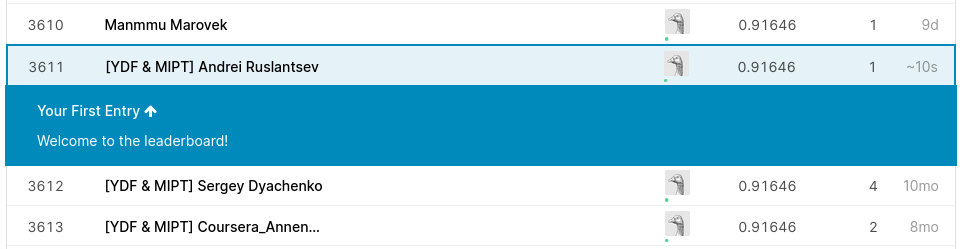

### Добавим признаки из ноутбука для третьей недели, попробуем оптимизировать гиперпараметры.

Обучим логистическую регрессию

Посчитаем ROC AUC на отложенной выборке. На первый взгляд получилось неплохо.

In [131]:
np.round(roc_auc_score(y_true=y_valid, y_score=logit_valid_pred_proba[:, 1]), 3)

0.979

Обучим классификатор на всех данных. Сделаем прогноз для тестовой выборки и отправим его.

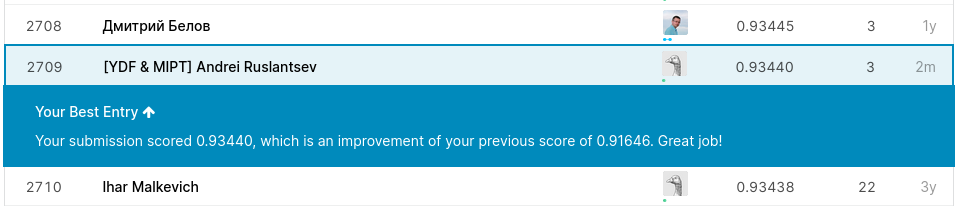

Бенчмарк "Logit +3 features" со скором 0.92784 побит.

Результат можно еще улучшить, применяя другие модели, придумывая дополнительные признаки и т.п. Как минимум стоит попробовать бустинг или случайный лес.

# <center>Неделя 6.  Vowpal Wabbit

На этой неделе мы познакомимся с популярной библиотекой Vowpal Wabbit и попробуем ее на данных по посещению сайтов.

**План 6 недели:**
- Часть 1. Статья по Vowpal Wabbit
- Часть 2. Применение Vowpal Wabbit к данным по посещению сайтов
 - 2.1. Подготовка данных
 - 2.2. Валидация по отложенной выборке
 - 2.3. Валидация по тестовой выборке (Public Leaderboard)


## Часть 1. Статья про Vowpal Wabbit
Прочитайте [статью](https://habrahabr.ru/company/ods/blog/326418/) про Vowpal Wabbit на Хабре из серии открытого курса OpenDataScience по машинному обучению. Материал для этой статьи зародился из нашей специализации. Скачайте [тетрадку](https://github.com/Yorko/mlcourse_open/blob/master/jupyter_russian/topic08_sgd_hashing_vowpal_wabbit/topic8_sgd_hashing_vowpal_wabbit.ipynb), прилагаемую к статье, посмотрите код, изучите его, поменяйте, только так можно разобраться с Vowpal Wabbit.

## Часть 2. Применение Vowpal Wabbit к данным по посещению сайтов

Исходные данные все те же самые, но выделено 400 пользователей, и решается задача их идентификации.

Vowpal Wabbit любит, чтоб метки классов были распределены от 1 до K, где K – число классов в задаче классификации (в нашем случае – 400). Поэтому пришлось применить LabelEncoder, да еще и +1 потом добавить (LabelEncoder переводит метки в диапозон от 0 до K-1).

Были обучены модели Vowpal Wabbit, LogisticRegression и SGDClassifier на обучающей выборке и сделаны прогнозы на тестовой выборке. На публичной части тестовой выборки получились следующие доли правильных ответов:

- 0.194 для Vowpal Wabbit 
- 0.188 для SGDClassifier
- 0.199 для Логистической регрессии

# <center> Результаты

В рамках выполнения проекта по идентификации интернет-пользователей были изучены и использованы такие вещи как
- разреженные матрицы
- визуальный анализ данных
- поиск гиперпараметров по заданной сетке
- частотные словари
- мешок слов

В результате проведен визуальный анализ данных, построены модели классификаторов, выбрана лучшая из них, подобраны оптимальные параметры для модели и произведена оценка качества выбранной модели.